In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Data 

In [2]:
data = pd.read_csv('Global_superstore2.csv')    # download the file first 

#url = 'https://raw.githubusercontent.com/jmk495/6103_Final_Project/main/Global_Superstore2.csv' # not working, probably needs access
#data = pd.read_csv(url)

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
# Removing irrelevant columns
df = data.drop(['Row ID', 'Order ID', 'Ship Date', 'Customer ID', 'Customer Name',
              'Postal Code', 'Product ID', 'Product Name'], axis = 1)
df.head()

,Order Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,31-07-2012,Same Day,Consumer,New York City,New York,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical
1,05-02-2013,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical
2,17-10-2013,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium
3,28-01-2013,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium
4,05-11-2013,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
# Number of categories (levels) in each categorical variable:

for i in df:
    if df[i].dtype == ('object' or 'category'):
        print(i, len(df[i].unique()))

Order Date 1430
Ship Mode 4
Segment 3
City 3636
State 1094
Country 147
Market 7
Region 13
Category 3
Sub-Category 17
Order Priority 4


### Monthly sales for all categories 

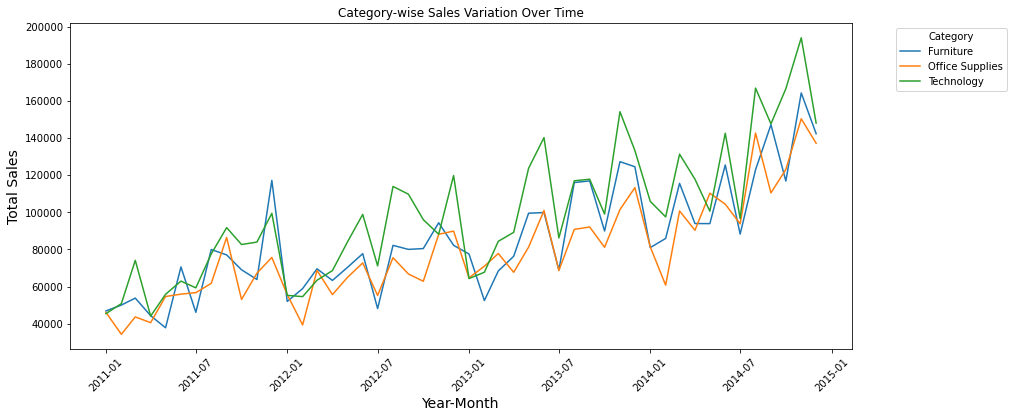

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['YearMonth'] = df['Order Date'].dt.to_period('M')  # setting to monthly steps

# Convert 'YearMonth' to timestamp
df['YearMonth'] = df['YearMonth'].dt.to_timestamp()

category_sales = df.groupby(['YearMonth', 'Category'])['Sales'].sum().reset_index()
sub_category_sales = df.groupby(['YearMonth', 'Category', 'Sub-Category'])['Sales'].sum().reset_index()

plt.figure(figsize = (14, 6))
sns.lineplot(x = 'YearMonth', y = 'Sales', hue = 'Category', data = category_sales, markers = True)
plt.title('Category-wise Sales Variation Over Time')
plt.xlabel('Year-Month', fontsize = 14)
plt.ylabel('Total Sales', fontsize = 14)
plt.xticks(rotation = 45)
plt.legend(title='Category', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

### Sub-category sales  

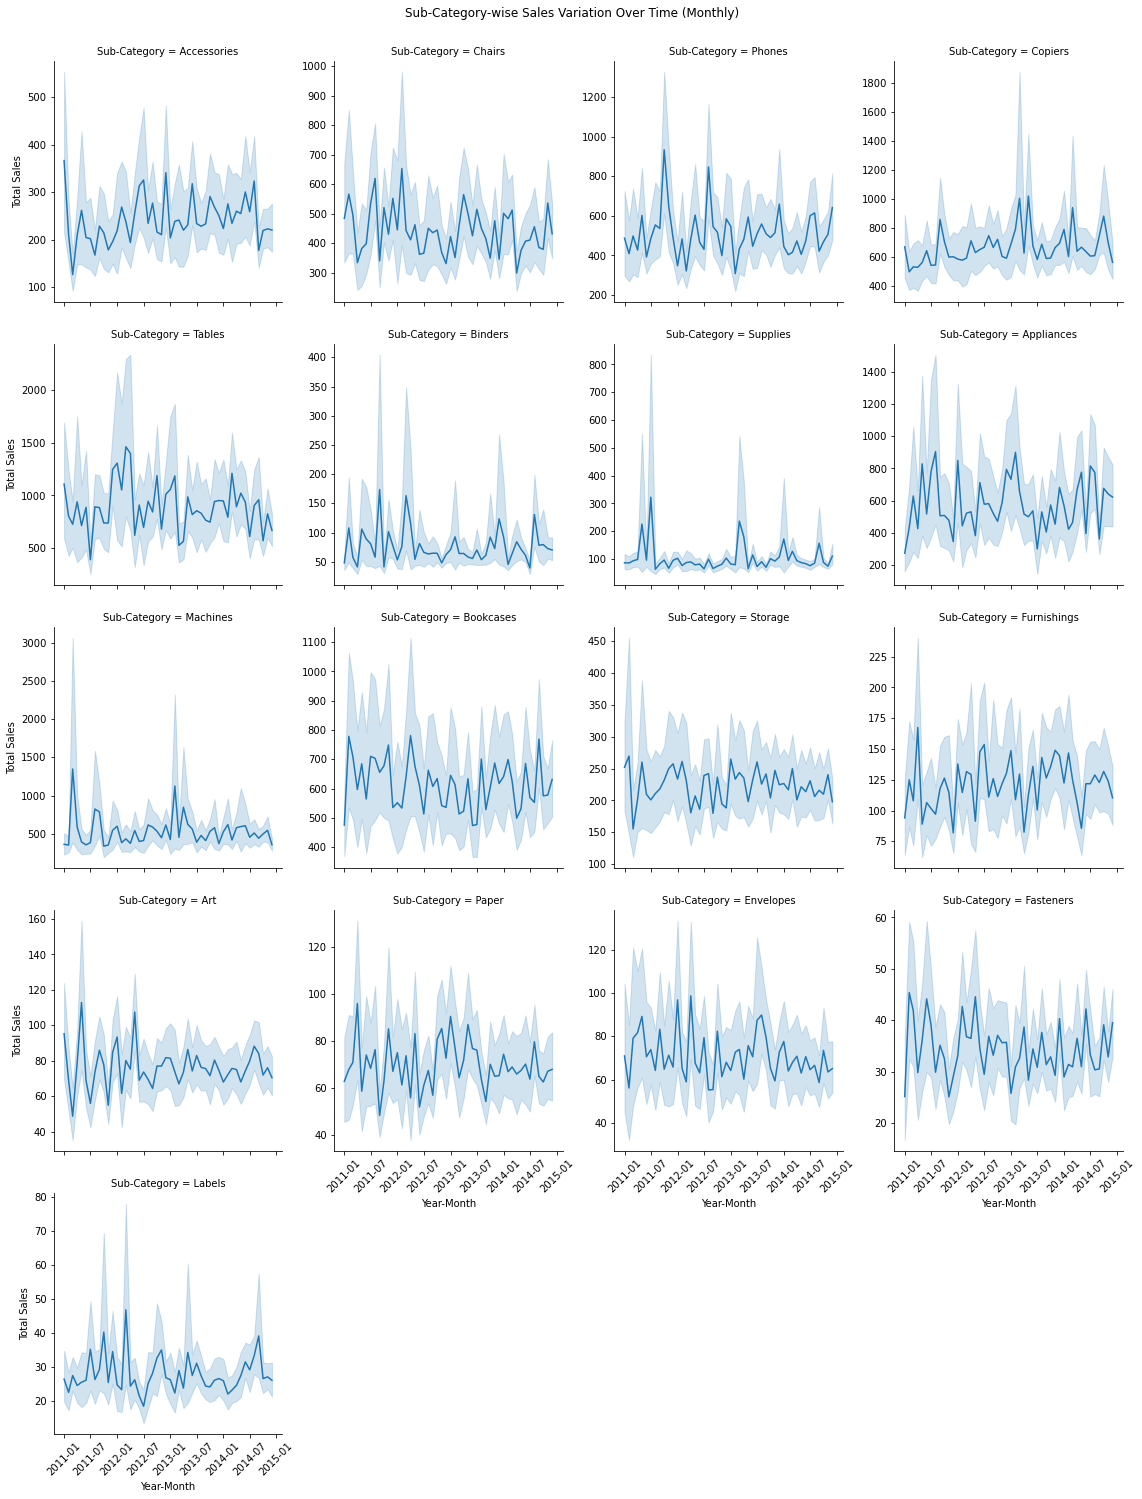

In [6]:
unique_subcategories = df['Sub-Category'].unique()

g = sns.FacetGrid(df, col = 'Sub-Category', col_wrap = 4, height = 4, sharey = False)
g.map(sns.lineplot, 'YearMonth', 'Sales')

g.fig.suptitle('Sub-Category-wise Sales Variation Over Time (Monthly)', y = 1.02)
g.set_axis_labels('Year-Month', 'Total Sales')
g.set_xticklabels(rotation = 45)
plt.show()

### Correlation among numerical features 

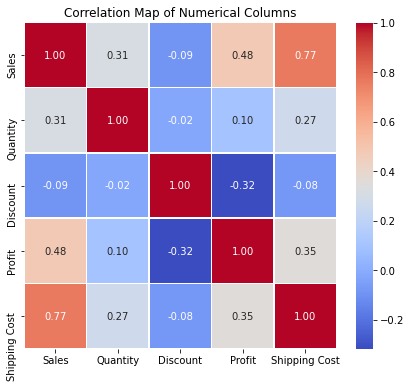

In [7]:
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
numerical_df = df[numerical_columns]

correlation_matrix = numerical_df.corr()

plt.figure(figsize = (7, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = .5)
plt.title('Correlation Map of Numerical Columns')
plt.show()

CORRELATION PLOTS

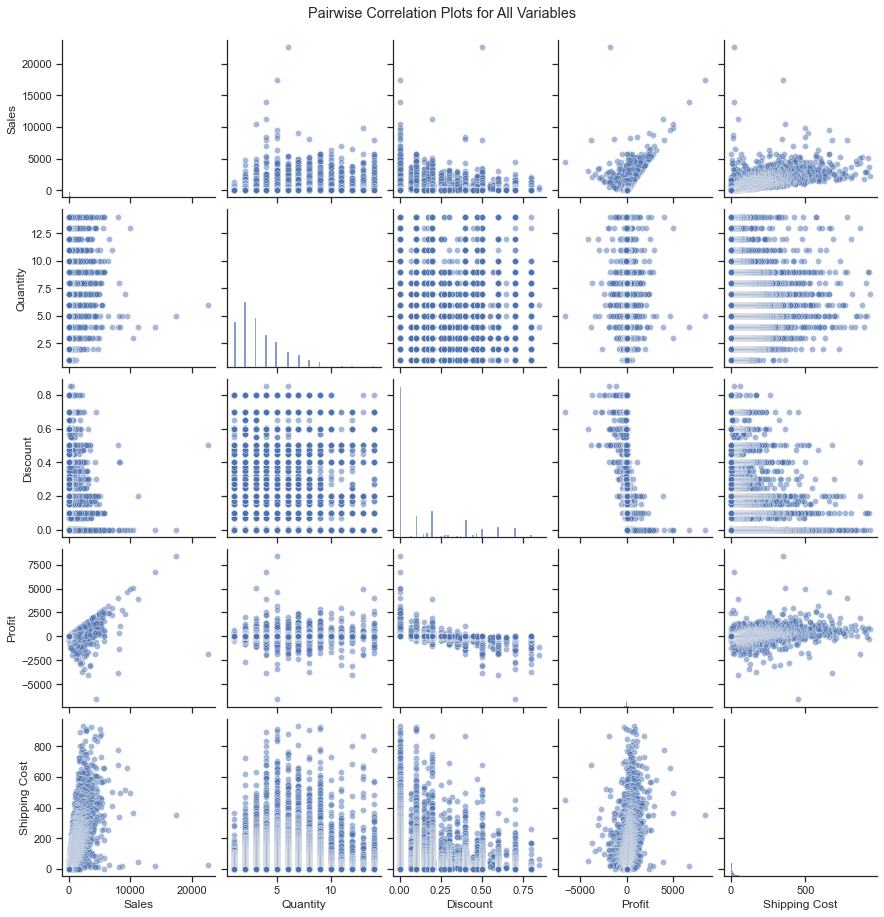

In [8]:
sns.set(style = "ticks")
sns.pairplot(df, plot_kws = {'alpha': 0.5})

plt.suptitle('Pairwise Correlation Plots for All Variables', y = 1.02)
plt.show()

In [ ]:
"""
selected_columns = ['Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category',
                    'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']

numeric_columns = df[selected_columns].select_dtypes(include = ['float64', 'int64']).columns  # numeric features
categorical_columns = df[selected_columns].select_dtypes(include = 'object').columns          # categorical features

sns.set(style = "ticks")
sns.pairplot(df[numeric_columns], plot_kws = {'alpha': 0.5})  

# Plot pair plots for categorical variables with different colors for each category
for cat_column in categorical_columns:
    sns.pairplot(df, hue = cat_column, palette = 'Set1', vars = numeric_columns, plot_kws = {'alpha': 0.5})

# Adjust layout
plt.suptitle('Pairwise Correlation Plots for Selected Variables with Color by Category', y = 1.02)
plt.show()
"""

ENCODING CATEGORICAL VARIABLES WITH LOWER CARDINALITY

In [9]:
# Currently, the threshold is set to 20 categories

categorical_features = df.select_dtypes(include = ['object', 'category']).columns
low_cardinality_features = [feature for feature in categorical_features if df[feature].nunique() <= 20]

df2 = df.copy()     # the new dataframe with encoded categorical variables

label_mappings = {}

for feature in low_cardinality_features:
    encoded_cols = pd.get_dummies(df2[feature], prefix = feature, drop_first = True)
    label_mappings[feature] = dict(enumerate(df2[feature].astype('category').cat.categories))
    df2 = pd.concat([df2, encoded_cols], axis = 1)

print("Label Mappings:", label_mappings)
df2.head()

Label Mappings: {'Ship Mode': {0: 'First Class', 1: 'Same Day', 2: 'Second Class', 3: 'Standard Class'}, 'Segment': {0: 'Consumer', 1: 'Corporate', 2: 'Home Office'}, 'Market': {0: 'APAC', 1: 'Africa', 2: 'Canada', 3: 'EMEA', 4: 'EU', 5: 'LATAM', 6: 'US'}, 'Region': {0: 'Africa', 1: 'Canada', 2: 'Caribbean', 3: 'Central', 4: 'Central Asia', 5: 'EMEA', 6: 'East', 7: 'North', 8: 'North Asia', 9: 'Oceania', 10: 'South', 11: 'Southeast Asia', 12: 'West'}, 'Category': {0: 'Furniture', 1: 'Office Supplies', 2: 'Technology'}, 'Sub-Category': {0: 'Accessories', 1: 'Appliances', 2: 'Art', 3: 'Binders', 4: 'Bookcases', 5: 'Chairs', 6: 'Copiers', 7: 'Envelopes', 8: 'Fasteners', 9: 'Furnishings', 10: 'Labels', 11: 'Machines', 12: 'Paper', 13: 'Phones', 14: 'Storage', 15: 'Supplies', 16: 'Tables'}, 'Order Priority': {0: 'Critical', 1: 'High', 2: 'Low', 3: 'Medium'}}


,Order Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,2012-07-31,Same Day,Consumer,New York City,New York,United States,US,East,Technology,Accessories,...,0,0,0,0,0,0,0,0,0,0
1,2013-05-02,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,...,0,0,0,0,0,0,0,0,0,0
2,2013-10-17,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,...,0,0,0,1,0,0,0,0,0,1
3,2013-01-28,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,...,0,0,0,1,0,0,0,0,0,1
4,2013-05-11,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,...,0,0,0,0,0,0,0,0,0,0


### WCSS method for optimal no. of clusters  
#### Currently, all the numeric and cateogrical features with cardinality less than the threshold are retained

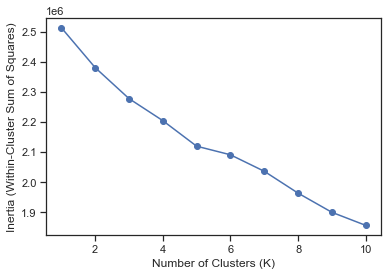

In [10]:
features_for_clustering = df2.select_dtypes(include = ['number']).columns   # features for clustering 
X = df2[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)    # feature scaling

# Optimal number of clusters using the elbow method (by WCSS method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), inertia, marker = 'o')
plt.xlabel('Number of Clusters (K)', fontsize = 12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize = 12)
plt.show()

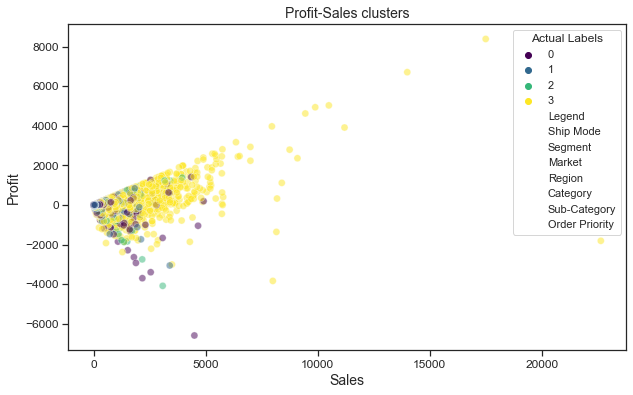

In [14]:
optimal_k = 4    # Update this based on the elbow method plot above

kmeans = KMeans(n_clusters = optimal_k, random_state = 42)   
df2['Cluster'] = kmeans.fit_predict(X_scaled)

legend_df = pd.DataFrame(label_mappings)

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Sales', y = 'Profit', hue = 'Cluster',
                s = 50, data = df2, palette = 'viridis',
                legend = 'full', alpha = 0.5)

plt.scatter([], [], label = 'Legend', alpha = 0)  # Empty scatter for the legend

for feature in low_cardinality_features:
    plt.scatter([], [], label = feature, alpha = 0)
plt.legend(title = 'Actual Labels', loc = 'upper right')
plt.title('Profit-Sales clusters', fontsize = 14)
plt.xlabel('Sales', fontsize = 14)
plt.ylabel('Profit', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()